# Разведывательный анализ данных (EDA) 

### Цель проекта — провести разведывательный анализ данных и составить отчёт по его результатам, для того, чтобы в дальнейшем отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике .

### Задачи проекта :  
#### - провести первичную обработку данных
#### - посмотреть на распределение признака для числовых переменных и устранить выбросы
#### - оценить количество уникальных значений для номинативных переменных
#### - по необходимости преобразовать данные
#### - провести корреляционный анализ количественных переменных, отобрать не коррелирующие переменные
#### - проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину (score)
#### - сформулировать выводы относительно качества данных и тех переменных, которые, следует использованы в дальнейшем построении модели.


### Загрузка данных и импорт нужных библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.xls')
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Первичный анализ данных в столбцах

### Функции для обработки сталбцов:

In [2]:
def number_of_unique_meanings(column):
    students[column] = students[column].apply(lambda x: None if pd.isnull(x) else None if x == ''else None if x == 'NaN' else x) 
    display(pd.DataFrame(students[column].value_counts()))
    print("Значений, встретившихся в столбце более 10 раз:", (students[column].value_counts()>10).sum())
    print("Уникальных значений:",students[column].nunique())
    print('Информация о данных в столбце:')
    students.loc[:, [column]].info()

In [3]:
def distribution(column, bins = 10):
    print('Информация о данных в столбце:')
    students.loc[:, [column]].info()
    print('Параметры распределения:')
    print(students[column].describe())
    print('Гистограмма:')
    print(students[column].hist(bins = bins))

In [4]:
def emissions_removal(data_frame, column):
    perc25 = data_frame[column].quantile(0.25)
    perc75 = data_frame[column].quantile(0.75)
    IQR = perc75 - perc25
    return data_frame.loc[data_frame[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

### 1) school — аббревиатура школы, в которой учится ученик

In [5]:
number_of_unique_meanings('school')

,school
GP,349
MS,46


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### 2) sex — пол ученика ('F' - женский, 'M' - мужской)

In [6]:
number_of_unique_meanings('sex')

,sex
F,208
M,187


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### 3) age — возраст ученика (от 15 до 22)

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
Параметры распределения:
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


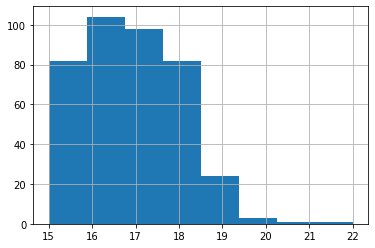

In [7]:
distribution('age',8)

### 4) address — тип адреса ученика ('U' - городской, 'R' - за городом)

In [8]:
number_of_unique_meanings('address')

,address
U,295
R,83


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### 5) famsize — размер семьи('LE3' <= 3, 'GT3' >3)

In [9]:
number_of_unique_meanings('famsize')

,famsize
GT3,261
LE3,107


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### 6) Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [10]:
number_of_unique_meanings('Pstatus')

,Pstatus
T,314
A,36


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### 7) Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Параметры распределения:
count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


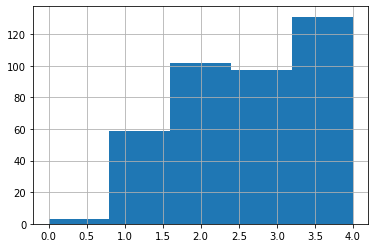

In [11]:
distribution('Medu',5)

### 8) Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Параметры распределения:
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


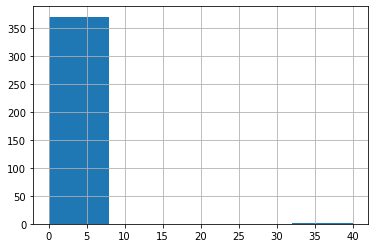

In [12]:
distribution('Fedu',5)

#### Удалим выбросы

In [13]:
 students = students.loc[students['Fedu'].between(0, 5)]

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    370 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Параметры распределения:
count    370.000000
mean       2.513514
std        1.087540
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


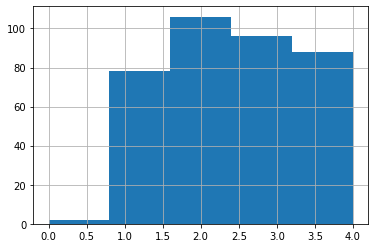

In [14]:
distribution('Fedu',5)

### 10) Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [15]:
number_of_unique_meanings('Fjob')

,Fjob
other,189
services,94
teacher,26
at_home,14
health,13


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    336 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


### 11) reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [16]:
number_of_unique_meanings('reason')

,reason
course,128
reputation,98
home,96
other,32


Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  354 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


### 12) guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [17]:
number_of_unique_meanings('guardian')

,guardian
mother,236
father,78
other,26


Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  340 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


### 13) traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  345 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Параметры распределения:
count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


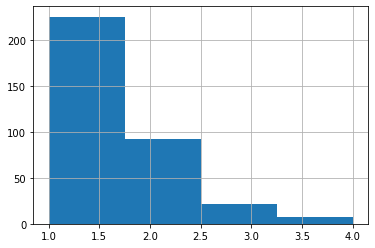

In [18]:
distribution('traveltime',4)

### 14) studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  363 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Параметры распределения:
count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


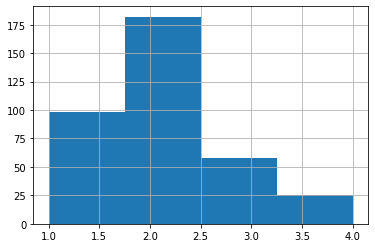

In [19]:
distribution('studytime',4)

### 15) failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  351 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Параметры распределения:
count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


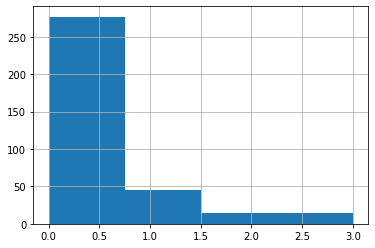

In [20]:
distribution('failures',4)

### 16) schoolsup — дополнительная образовательная поддержка (yes или no)

In [21]:
number_of_unique_meanings('schoolsup')

,schoolsup
no,314
yes,47


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  361 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## 17 famsup — семейная образовательная поддержка (yes или no)

In [22]:
number_of_unique_meanings('famsup')

,famsup
yes,204
no,131


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  335 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## 18 paid — дополнительные платные занятия по математике (yes или no)

In [23]:
number_of_unique_meanings('paid')

,paid
no,188
yes,145


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    333 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## 19 activities — дополнительные внеучебные занятия (yes или no)

In [24]:
number_of_unique_meanings('activities')

,activities
yes,180
no,176


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  356 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## 20 nursery — посещал детский сад (yes или no)

In [25]:
number_of_unique_meanings('nursery')

,nursery
yes,279
no,75


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  354 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## 21 higher — хочет получить высшее образование (yes или no)

In [26]:
number_of_unique_meanings('higher')

,higher
yes,333
no,19


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  352 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## 22 internet — наличие интернета дома (yes или no)

In [27]:
number_of_unique_meanings('internet')

,internet
yes,283
no,54


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  337 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## 23 romantic — в романтических отношениях (yes или no)

In [28]:
number_of_unique_meanings('romantic')

,romantic
no,226
yes,116


Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2
Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  342 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  346 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Параметры распределения:
count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


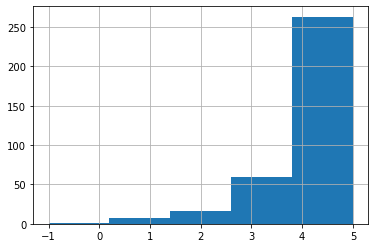

In [29]:
distribution('famrel',5)

#### удалим выбрасы

In [30]:
students = students.loc[students['famrel'].between(1, 5)]

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  345 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB
Параметры распределения:
count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


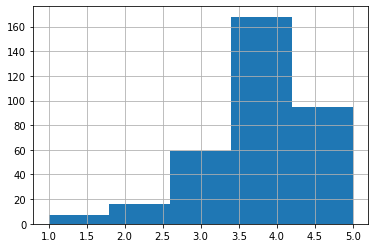

In [31]:
distribution('famrel',5)

## 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  336 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB
Параметры распределения:
count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


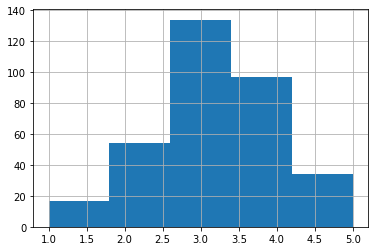

In [32]:
distribution('freetime',5)

## 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   337 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB
Параметры распределения:
count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


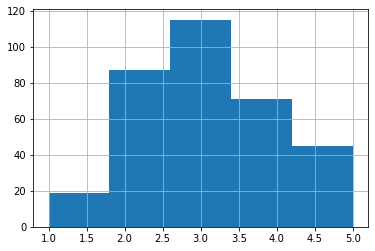

In [33]:
distribution('goout',5)

## 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  332 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB
Параметры распределения:
count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


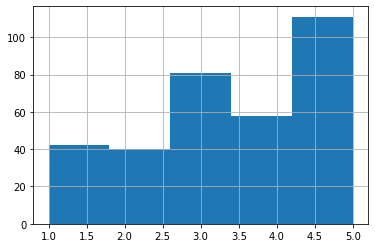

In [34]:
distribution('health',5)

## 28 absences — количество пропущенных занятий

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  333 non-null    float64
dtypes: float64(1)
memory usage: 5.4 KB
Параметры распределения:
count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


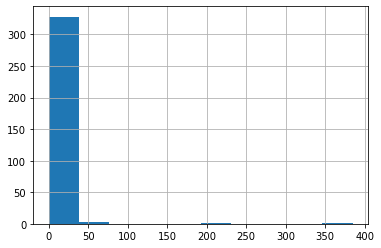

In [35]:
distribution('absences')

#### удалим выбросы

In [36]:
students = emissions_removal(students,'absences')

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  318 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB
Параметры распределения:
count    318.000000
mean       4.522013
std        4.840466
min        0.000000
25%        0.000000
50%        3.500000
75%        7.000000
max       20.000000
Name: absences, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


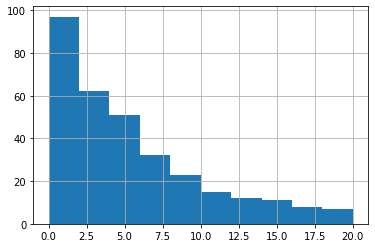

In [37]:
distribution('absences')

## 29 score — баллы по госэкзамену по математике

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   313 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB
Параметры распределения:
count    313.000000
mean      52.124601
std       22.511546
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


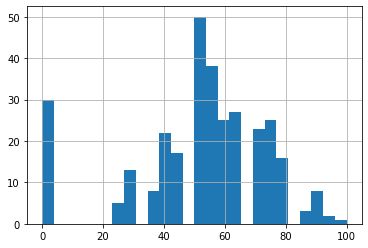

In [38]:
distribution('score',26)

#### удалим выбросы

Информация о данных в столбце:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   282 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB
Параметры распределения:
count    282.000000
mean      57.500000
std       15.344502
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max       95.000000
Name: score, dtype: float64
Гистограмма:
AxesSubplot(0.125,0.125;0.775x0.755)


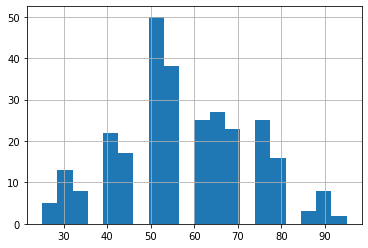

In [39]:
students = emissions_removal(students,'score')
distribution('score',20)

### Промежуточные выводы о данных:
#### - количество уникальных значений для всех номинативных переменных не большое
#### - никоторые числовые переменные содержат выбросы и заведомо некорректные значения
#### - в данных содержатся пропуски
#### - в целом данные достаточно чистые

## Корреляционный анализ

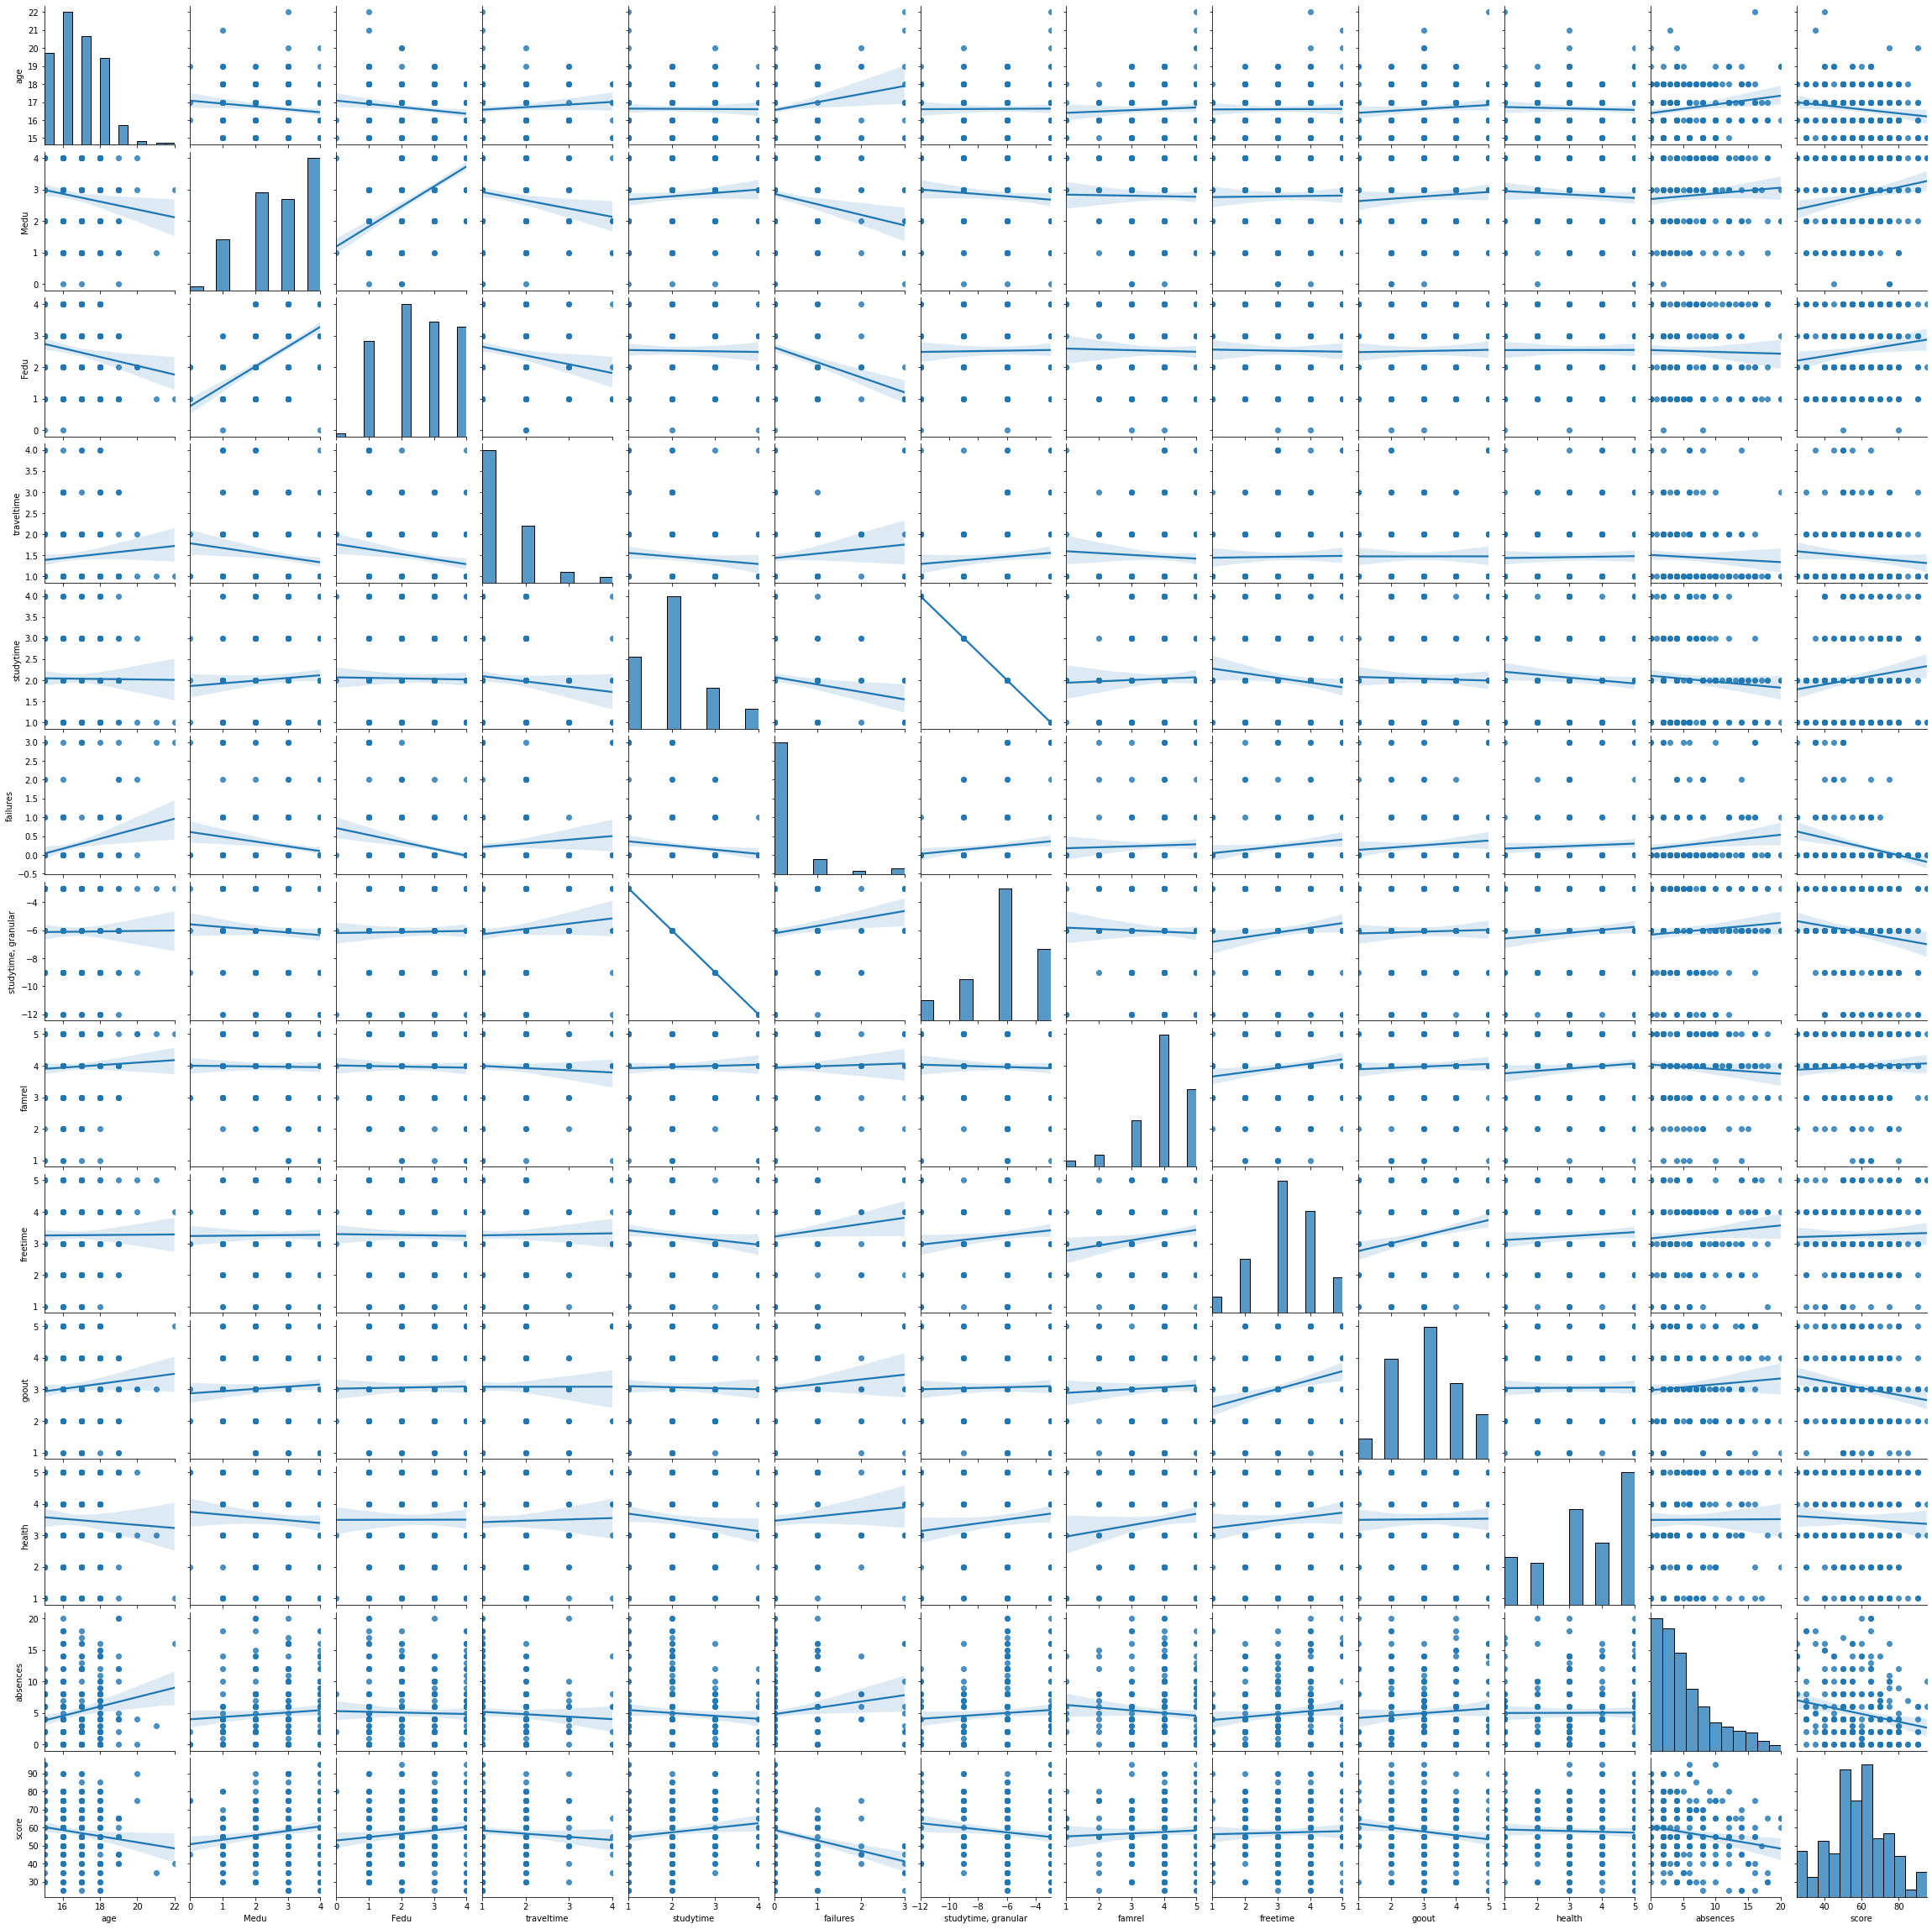

In [40]:
sns.pairplot(students, kind = 'reg')

In [41]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.141369,-0.158538,0.083234,-0.007635,0.242763,0.007635,0.054353,0.005672,0.092766,-0.044309,0.189632,-0.137439
Medu,-0.141369,1.000000,0.631393,-0.172000,0.082651,-0.205735,-0.082651,-0.014148,0.010693,0.071378,-0.069577,0.080657,0.178431
Fedu,-0.158538,0.631393,1.000000,-0.182281,-0.016248,-0.294872,0.016248,-0.021202,-0.015369,0.017921,0.001332,-0.025646,0.133525
traveltime,0.083234,-0.172000,-0.182281,1.000000,-0.105160,0.101883,0.105160,-0.055421,0.015630,0.000372,0.021822,-0.057486,-0.084251
studytime,-0.007635,0.082651,-0.016248,-0.105160,1.000000,-0.140376,-1.000000,0.034608,-0.129717,-0.026332,-0.113151,-0.081322,0.141330
failures,0.242763,-0.205735,-0.294872,0.101883,-0.140376,1.000000,0.140376,0.034408,0.133849,0.096587,0.068545,0.137605,-0.258930
"studytime, granular",0.007635,-0.082651,0.016248,0.105160,-1.000000,0.140376,1.000000,-0.034608,0.129717,0.026332,0.113151,0.081322,-0.141330
famrel,0.054353,-0.014148,-0.021202,-0.055421,0.034608,0.034408,-0.034608,1.000000,0.149642,0.049883,0.118484,-0.078867,0.048744
freetime,0.005672,0.010693,-0.015369,0.015630,-0.129717,0.133849,0.129717,0.149642,1.000000,0.264046,0.087109,0.098319,0.028089
goout,0.092766,0.071378,0.017921,0.000372,-0.026332,0.096587,0.026332,0.049883,0.264046,1.000000,0.007253,0.083687,-0.153497


### Промежуточные выводы :
#### - данные в столбце 'studytime, granular' дублируют данные из 'studytime', поэтому столбец 'studytime, granular' следует исключить
#### - наибольшее влияние на 'score' оказывают данные из столбцов: 'age', 'Medu', 'Fedu', 'studytime','goout' и'absences'
#### - из'Medu', 'Fedu' большее влияние оказывает 'Medu', поэтому влияние 'Fedu' возможно объясняется большой корреляцией между 'Medu'и 'Fedu' 
#### - влияние таких параметров как: 'traveltime', 'freetime', 'failures' не так велико, и возможно связано с зависимостью этих параметров от 'studytime'  
#### - влияние таких параметров как: 'famrel', 'health' практически отсутствует

### Исходя из проведённого анализа для построение модели следует оставить следующие числовые переменные : 'age', 'Medu' ,'Fedu' , 'studytime','goout' и'absences'


## Анализ номинативных переменных

### Функции для анализа:


In [42]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students,
               ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.10/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

### Построение графиков


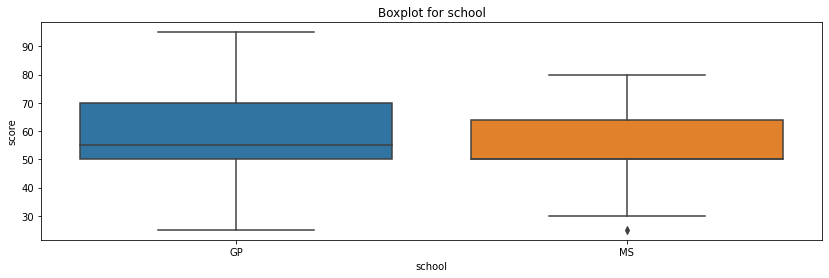

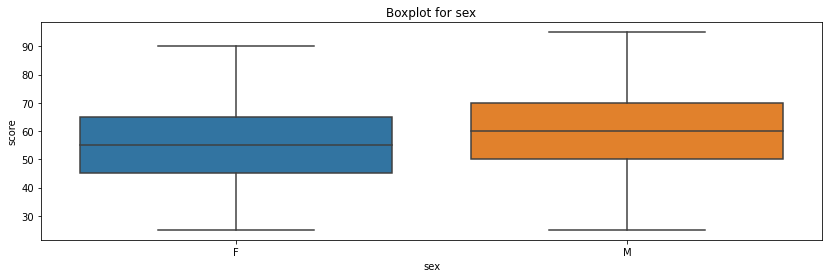

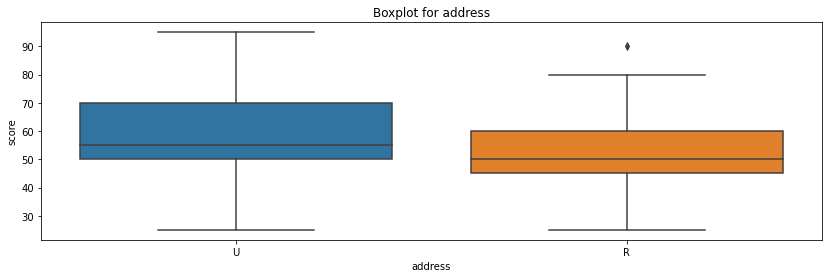

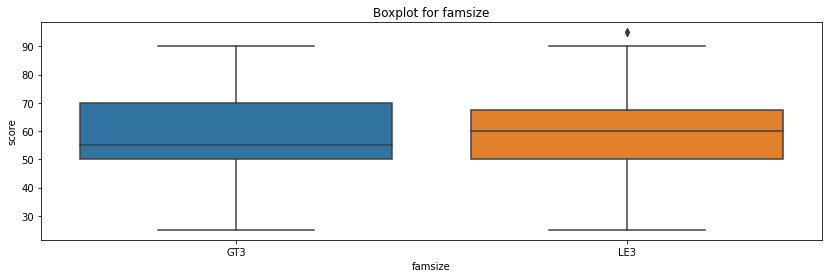

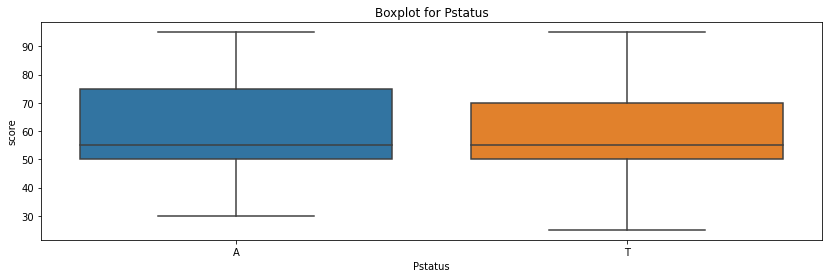

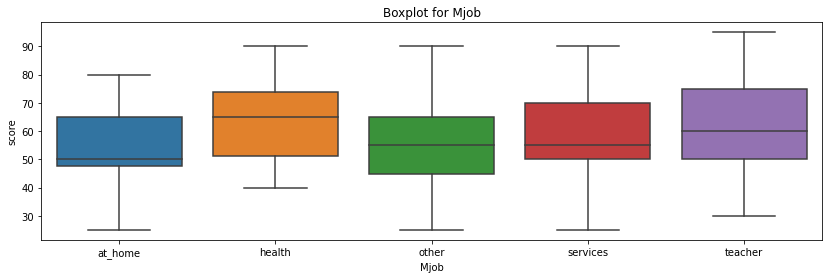

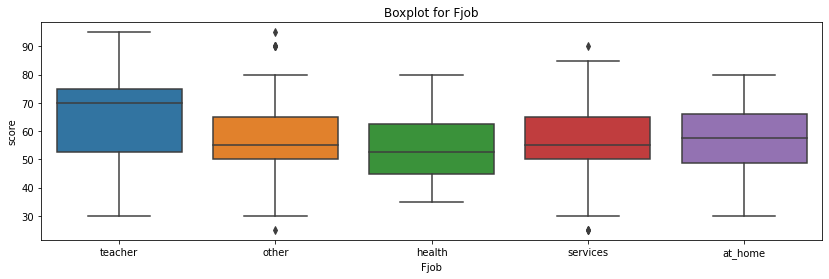

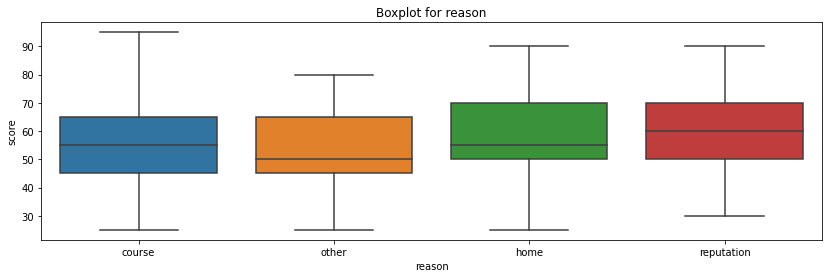

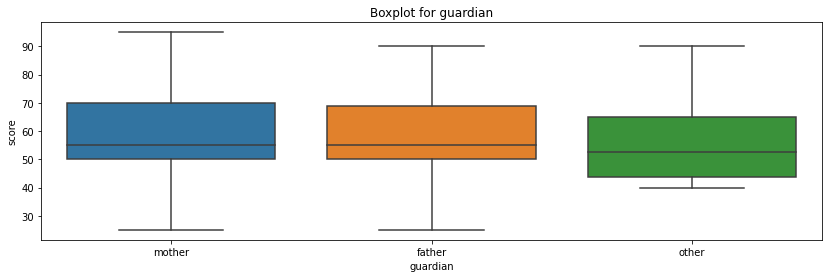

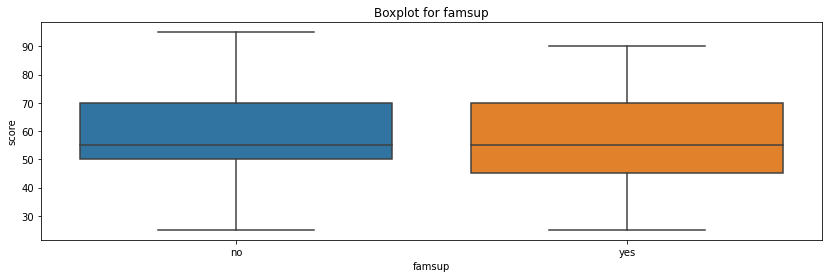

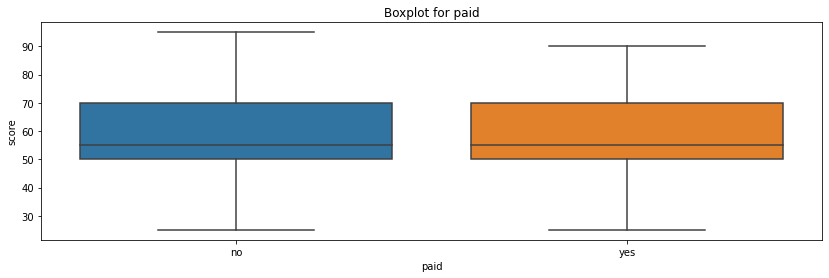

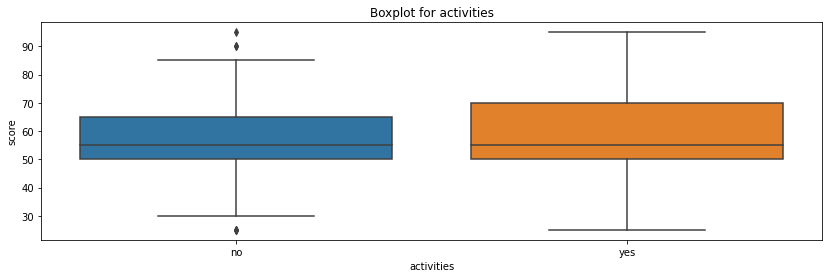

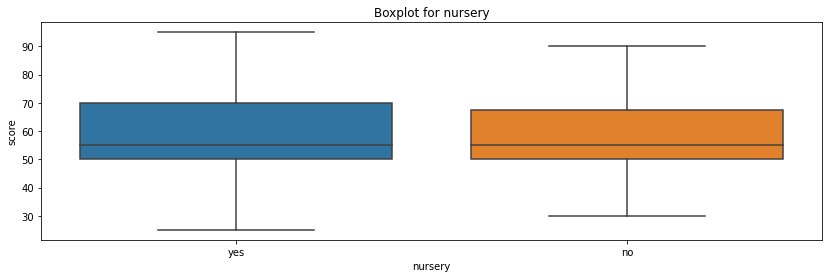

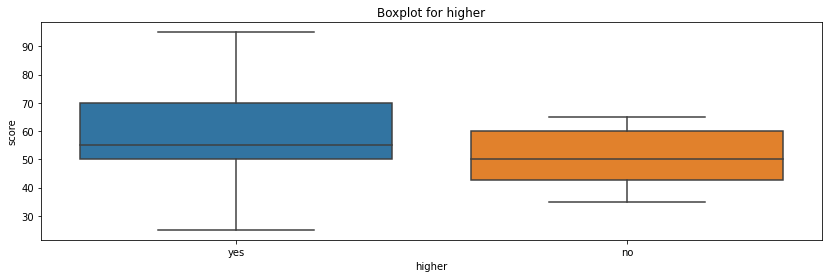

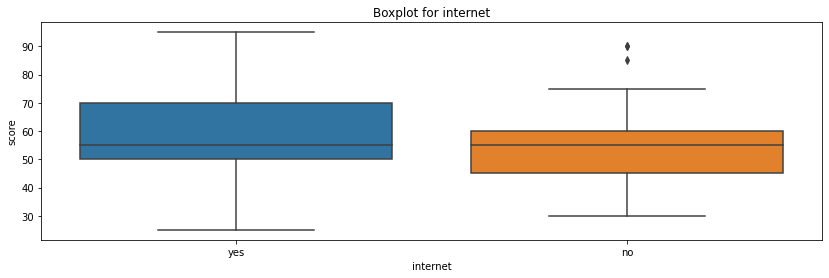

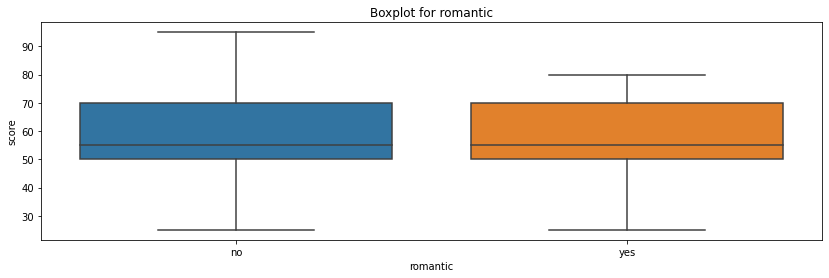

In [43]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob','reason','guardian','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_boxplot(col)

#### Судя по графикам наибольшее влеяние на 'score' могут оказывают такие переменные как: 'sex','address','Mjob' и 'higher' 

### Тест Стьюдента

In [44]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus','Mjob','Fjob','reason','guardian','famsup','paid','activities','nursery','higher','internet','romantic']:
    get_stat_dif(col)    

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob


### Исходя из проведённого анализа для построение модели следует оставить следующие номинативные переменные : 'sex','address' и 'Mjob'

## Построение итогового датасета для построения модели: 

In [45]:
students_for_model = students.loc[:, [ 'sex','address','Mjob','age', 'Medu' ,'Fedu' , 'studytime','goout','absences','score' ]]
students_for_model.head()

,sex,address,Mjob,age,Medu,Fedu,studytime,goout,absences,score
0,F,U,at_home,18,4.0,4.0,2.0,4.0,6.0,30.0
1,F,U,at_home,17,1.0,1.0,2.0,3.0,4.0,30.0
2,F,U,at_home,15,1.0,1.0,2.0,2.0,10.0,50.0
3,F,U,health,15,4.0,2.0,3.0,2.0,2.0,75.0
4,F,U,other,16,3.0,3.0,2.0,2.0,4.0,50.0


## Выводы

###  В данных достаточно мало пустых значений.
###  Никоторые числовые переменные содержат выбросы и заведомо некорректные значения, но в целом данные достаточно чистые.
###  Исходя из проведённого анализа для построение модели следует оставить следующие числовые переменные : 'age', 'Medu' ,'Fedu' , 'studytime','goout' и'absences', и следующие номинативные переменные : 'sex','address' и 'Mjob'.
